In [6]:
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

import re


stops = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stops, lowercase=True)
df = pd.read_csv('train.csv')
display(df)

# x = df.comment_text
# X = vectorizer.fit_transform(x)

# inertias = []
# mapping = {}
# K = range(1,10)
  
# for k in K: 
#     #Building and fitting the model 
#     kmeanModel = KMeans(n_clusters=k).fit(X) 
#     kmeanModel.fit(X)     
    
#     inertias.append(kmeanModel.inertia_) 
#     mapping[k] = kmeanModel.inertia_ 

# for key,val in mapping2.items(): 
#     print(str(key)+' : '+str(val))

# plt.plot(K, inertias, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Inertia') 
# plt.title('The Elbow Method using Inertia') 
# plt.show() 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raceking99/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
from PIL import Image
!pip3 install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
# Function for cleaning the comment text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

stop_words = set(stopwords.words('english'))


# Use the helper function to clean the text
df['comment_text'] = df['comment_text'].map(lambda comment : clean_text(comment))
df['comment_text'] = df['comment_text'].map(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [10]:
normal = df[df.toxic == 0]
toxic = df[df.toxic == 1]
severe_toxic = df[df.severe_toxic == 1]
obscene = df[df.obscene == 1]
threat = df[df.threat == 1]
insult = df[df.insult == 1]
identity_hate = df[df.identity_hate == 1]

display(toxic)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0
12,0005c987bdfc9d4b,hey talk exclusive group wp talibans good dest...,1,0,0,0,0,0
16,0007e25b2121310b,bye look come think comming back tosser,1,0,0,0,0,0
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
43,00190820581d90ce,fuck filthy mother ass dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,previous conversation fucking shit eating libe...,1,0,1,0,1,1
159514,ff39a2895fc3b40e,mischievious pubic hair,1,0,0,0,1,0
159541,ffa33d3122b599d6,absurd edits absurd edits great white shark to...,1,0,1,0,1,0
159546,ffb47123b2d82762,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0


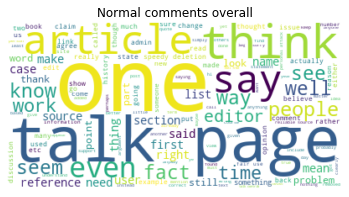

In [11]:
normal_words = " ".join(normal.comment_text)
wordcloud = WordCloud(background_color="white").generate(normal_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Normal comments overall') 
plt.axis("off")
plt.show()

['cocksucker', 'piss', 'around', 'work', 'hey', 'talk', 'exclusive', 'group', 'wp', 'talibans', 'good', 'destroying', 'self', 'appointed', 'purist', 'gang', 'one', 'asks', 'questions', 'abt', 'anti', 'social', 'destructive', 'non', 'contribution', 'wp', 'ask', 'sityush', 'clean', 'behavior', 'issue', 'nonsensical', 'warnings', 'bye', 'look', 'come', 'think', 'comming', 'back', 'tosser', 'gay', 'antisemmitian', 'archangel', 'white', 'tiger', 'meow', 'greetingshhh', 'uh', 'two', 'ways']
<class 'list'>

['cxcksxckxr', 'pxss', 'xrxxnd', 'wxrk', 'hxy', 'txlk', 'xxclxsxvx', 'grxxp', 'wp', 'txlxbxns', 'gxxd', 'dxstrxyxng', 'sxlf', 'xppxxntxd', 'pxrxst', 'gxng', 'xnx', 'xsks', 'qxxstxxns', 'xbt']


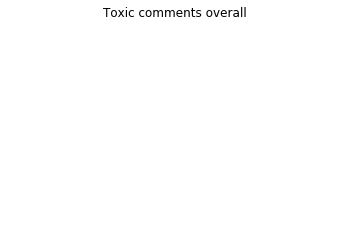

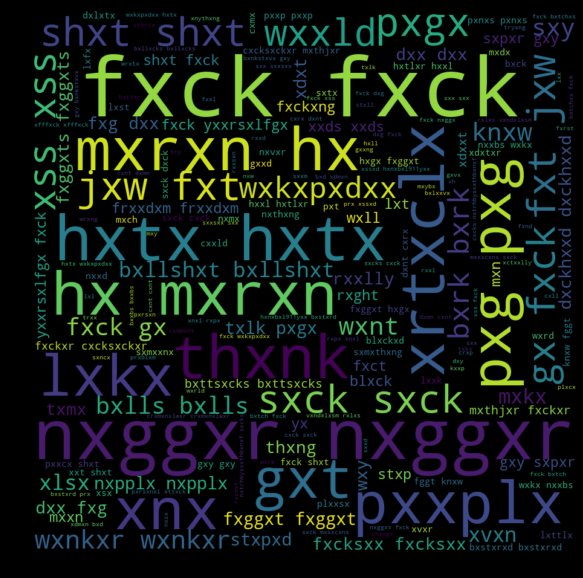

In [55]:
toxic_words = " ".join(toxic.comment_text)

toxiclist = toxic_words.split()
print(toxiclist[0:50]) 
print(type(toxiclist))

words = toxiclist
censored = []

# for word in words:
#     char_1 = word[0]
#     char_last = word[len(word)-1]
# #     char_last2 = word[len(word)-2]
#     y=""
#     for c in range(1, len(word)-1):
#         y += "x"
  
#     temp = char_1 + y + char_last#+ char_last2 + char_last
#     censored.append(temp)

stringg = ""

vowels = ['a', 'e', 'i', 'o', 'u']
# randomletters = ['o','i', 'e' 'u']


for word in words:
#     if(len(word) > 2):
#         word = word.replace(word[1], 'x')
# #     word[1] 'x'
    
#     if(len(word) > 3):
#         word = word.replace(word[2], 'x')

    for c in word:
        if(c in vowels):
            word = word.replace(c, 'x')

    
    censored.append(word)

print("")
print(censored[0:20])

fullstring = ""

for word in censored:
    fullstring += " " + word


wordcloud = WordCloud(width = 900, height = 900, background_color="black", stopwords="and").generate(fullstring)
plt.title('Toxic comments overall')
plt.axis("off")
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig('toxic_wordcloud.png')

['cocksucker', 'piss', 'around', 'work', 'stupid', 'peace', 'shit', 'stop', 'deleting', 'stuff', 'asshole', 'go', 'die', 'fall', 'hole', 'go', 'hell', 'stupid', 'fuck', 'mother', 'cunt', 'stinks', 'hi', 'im', 'fucking', 'bitch', '50', '180', '208', '181', 'motherfucking', 'piece', 'crap', 'fuckheads', 'blocking', 'us', 'know', 'thinking', 'nobody', 'really', 'attacked', 'revealed', 'age', 'announced', '14', 'subject', 'constant', 'storm', 'harassment', 'abuse']
<class 'list'>

['cxcksxckxr', 'pxss', 'xrxxnd', 'wxrk', 'stxpxd', 'pxxcx', 'shxt', 'stxp', 'dxlxtxng', 'stxff', 'xsshxlx', 'gx', 'dxx', 'fxll', 'hxlx', 'gx', 'hxll', 'stxpxd', 'fxck', 'mxthxr']


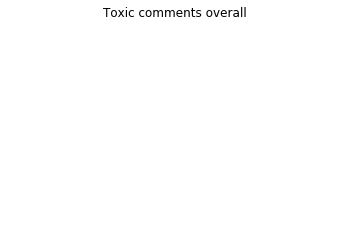

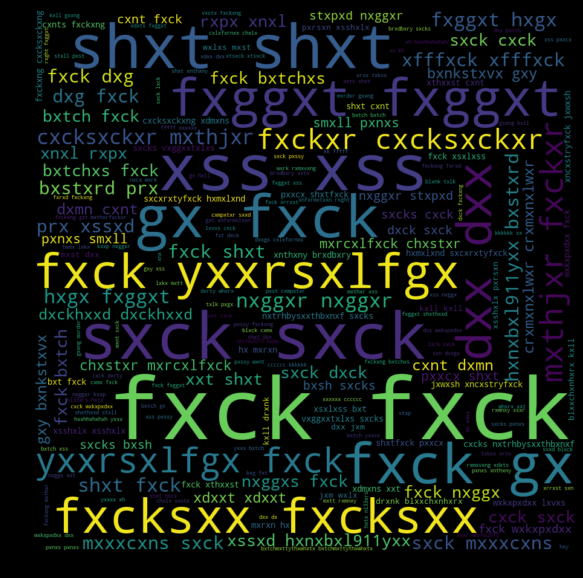

In [56]:
severe_toxic_words = " ".join(severe_toxic.comment_text)




severe = severe_toxic_words.split()
print(severe[0:50]) 
print(type(severe))

words = severe
censored = []

# for word in words:
#     char_1 = word[0]
#     char_last = word[len(word)-1]
#     y=""
#     for c in range(1, len(word)-1):
#         y += "x"
  
#     temp = char_1 + y + char_last
#     censored.append(temp)


vowels = ['a', 'e', 'i', 'o', 'u']
# randomletters = ['o','i', 'e' 'u']


for word in words:
#     if(len(word) > 2):
#         word = word.replace(word[1], 'x')
# #     word[1] 'x'
    
#     if(len(word) > 3):
#         word = word.replace(word[2], 'x')

    for c in word:
        if(c in vowels):
            word = word.replace(c, 'x')

    
    censored.append(word)

# stringg = ""

# for word in words:
#     if(len(word) > 2):
#         word = word.replace(word[1], 'x')
# #     word[1] 'x'
    
#     if(len(word) > 3):
#         word = word.replace(word[2], 'x')

    
#     censored.append(word)

# for word in censored:
#     stringg += " " + word

# for word in words:
#     if(len(word) == 3):
#         char_1 = word[0]
#         y = 'x'
#         char_2 = word[2]
        
#         temp = char_1 + y + char_2 
        
#         censored.append(temp)
#     elif(len(word) == 4):
#         char_1 = word[0]
#         y = 'x'
#         char_2 = word[2]
#         char_3 = word[3]
        
#         temp = char_1 + y + char_2 + char_3
        
#         censored.append(temp)

#     else:
#         char_1 = word[0]
#         char_last = word[len(word)-1]
#         char_2 = word[len(word)-2]

#         y=""
#         for c in range(1, len(word)-2):
#             y += "x"
  
#         temp = char_1 + y + char_3 + char_2 + char_last
#         censored.append(temp)
print("")
print(censored[0:20])

stringg = ""

for word in censored:
    stringg += " " + word


    
    
plt.clf()
wordcloud = WordCloud(width = 900, height = 900, background_color="black", stopwords="and").generate(stringg)
plt.title('Toxic comments overall')
plt.axis("off")
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig('toxic_wordcloud.png')

['gay', 'antisemmitian', 'archangel', 'white', 'tiger', 'meow', 'greetingshhh', 'uh', 'two', 'ways', 'erased', 'comment', 'ww2', 'holocaust', 'brutally', 'slaying', 'jews', 'gays', 'gypsys', 'slavs', 'anyone', '1', 'anti', 'semitian', 'shave', 'head', 'bald', 'go', 'skinhead', 'meetings', '2', 'doubt', 'words', 'bible', 'homosexuality', 'deadly', 'sin', 'make', 'pentagram', 'tatoo', 'forehead', 'go', 'satanistic', 'masses', 'gay', 'pals', '3', 'first', 'last', 'warning']
<class 'list'>

['gxy', 'xntxsxmmxtxxn', 'xrchxngxl', 'whxtx', 'txgxr', 'mxxw', 'grxxtxngshhh', 'xh', 'twx', 'wxys', 'xrxsxd', 'cxmmxnt', 'ww2', 'hxlxcxxst', 'brxtxlly', 'slxyxng', 'jxws', 'gxys', 'gypsys', 'slxvs']


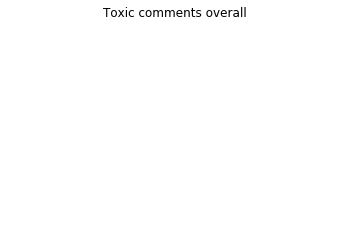

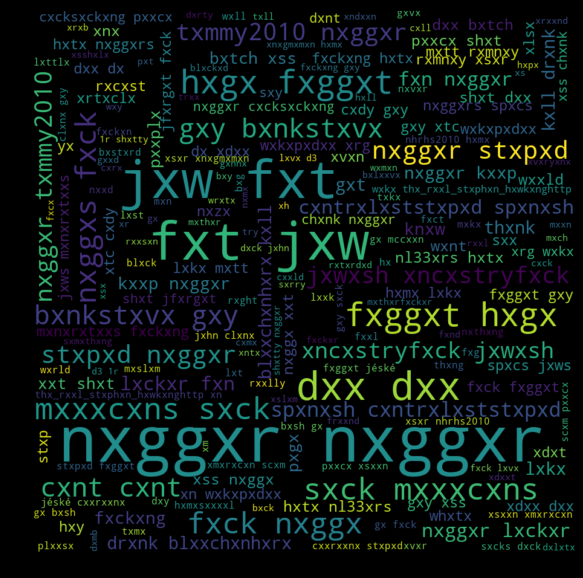

In [58]:
obscene_words = " ".join(obscene)


obscenes = severe_toxic_words.split()
print(obscene[0:50]) 
print(type(obscene))

words = obscene
censored = []

# for word in words:
#     char_1 = word[0]
#     char_last = word[len(word)-1]
#     y=""
#     for c in range(1, len(word)-1):
#         y += "x"
  
#     temp = char_1 + y + char_last
#     censored.append(temp)

vowels = ['a', 'e', 'i', 'o', 'u']

for word in words:
    for c in word:
        if(c in vowels):
            word = word.replace(c, 'x')

    
    censored.append(word)



print("")
print(censored[0:20])

stringg = ""

for word in censored:
    stringg += " " + word

    


plt.clf()
wordcloud = WordCloud(width = 900, height = 900, background_color="black", stopwords="and").generate(stringg)
plt.title('Toxic comments overall')
plt.axis("off")
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig('toxic_wordcloud.png')

['hi', 'back', 'last', 'warning', 'stop', 'undoing', 'edits', 'die', 'think', 'fagget', 'get', 'oife', 'burn', 'hell', 'hate', 'sorry', 'cant', 'sex', 'running', 'conndoms', 'also', 'sock', 'puppet', 'account', 'suprise', 'sincerely', 'man', 'track', 'internet', 'kill', 'fuck', 'smith', 'please', 'notified', 'die', 'want', 'dance', 'grave', 'would', 'first', 'time', 'bitch', 'fuck', 'find', 'live', 'sodomize', 'wife', 'burn', 'house', 'fuck']
<class 'list'>

['hx', 'bxck', 'lxst', 'wxrnxng', 'stxp', 'xndxxng', 'xdxts', 'dxx', 'thxnk', 'fxggxt', 'gxt', 'xxfx', 'bxrn', 'hxll', 'hxtx', 'sxrry', 'cxnt', 'sxx', 'rxnnxng', 'cxnndxms']


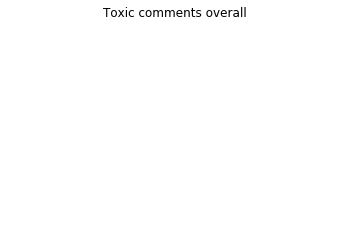

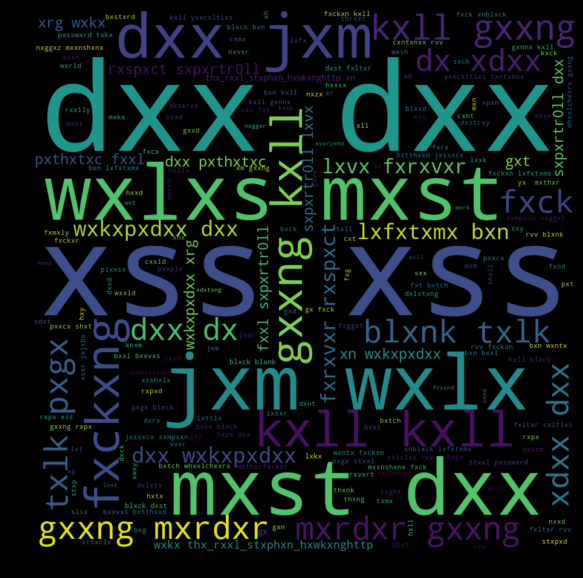

In [59]:
threat_words = " ".join(threat.comment_text)


obscene = threat_words.split()
print(obscene[0:50]) 
print(type(obscene))

words = obscene
censored = []

# for word in words:
#     char_1 = word[0]
#     char_last = word[len(word)-1]
#     y=""
#     for c in range(1, len(word)-1):
#         y += "x"
  
#     temp = char_1 + y + char_last
#     censored.append(temp)


vowels = ['a', 'e', 'i', 'o', 'u']

for word in words:
    for c in word:
        if(c in vowels):
            word = word.replace(c, 'x')

    
    censored.append(word)

print("")
print(censored[0:20])

stringg = ""

for word in censored:
    stringg += " " + word


plt.clf()
wordcloud = WordCloud(width = 900, height = 900, background_color="black", stopwords="and").generate(stringg)
plt.title('Toxic comments overall')
plt.axis("off")
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig('toxic_wordcloud.png')

['cocksucker', 'piss', 'around', 'work', 'gay', 'antisemmitian', 'archangel', 'white', 'tiger', 'meow', 'greetingshhh', 'uh', 'two', 'ways', 'erased', 'comment', 'ww2', 'holocaust', 'brutally', 'slaying', 'jews', 'gays', 'gypsys', 'slavs', 'anyone', '1', 'anti', 'semitian', 'shave', 'head', 'bald', 'go', 'skinhead', 'meetings', '2', 'doubt', 'words', 'bible', 'homosexuality', 'deadly', 'sin', 'make', 'pentagram', 'tatoo', 'forehead', 'go', 'satanistic', 'masses', 'gay', 'pals']
<class 'list'>

['cxcksxckxr', 'pxss', 'xrxxnd', 'wxrk', 'gxy', 'xntxsxmmxtxxn', 'xrchxngxl', 'whxtx', 'txgxr', 'mxxw', 'grxxtxngshhh', 'xh', 'twx', 'wxys', 'xrxsxd', 'cxmmxnt', 'ww2', 'hxlxcxxst', 'brxtxlly', 'slxyxng']


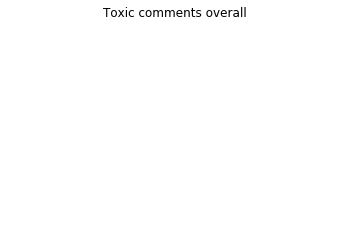

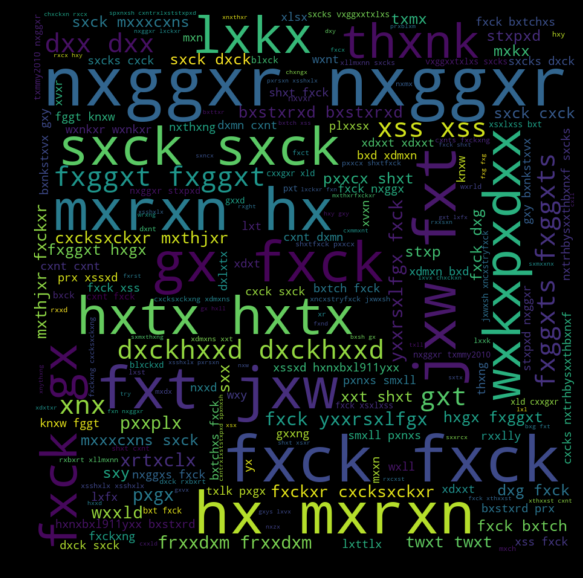

In [60]:
insult_words = " ".join(insult.comment_text)

obscene = insult_words.split()
print(obscene[0:50]) 
print(type(obscene))

words = obscene
censored = []

# for word in words:
#     char_1 = word[0]
#     char_last = word[len(word)-1]
#     y=""
#     for c in range(1, len(word)-1):
#         y += "x"
  
#     temp = char_1 + y + char_last
#     censored.append(temp)

vowels = ['a', 'e', 'i', 'o', 'u']

for word in words:
    for c in word:
        if(c in vowels):
            word = word.replace(c, 'x')

    
    censored.append(word)

print("")
print(censored[0:20])

stringg = ""

for word in censored:
    stringg += " " + word


plt.clf()
wordcloud = WordCloud(width = 900, height = 900, background_color="black", stopwords="and").generate(stringg)
plt.title('Toxic comments overall')
plt.axis("off")
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig('toxic_wordcloud.png')

['gay', 'antisemmitian', 'archangel', 'white', 'tiger', 'meow', 'greetingshhh', 'uh', 'two', 'ways', 'erased', 'comment', 'ww2', 'holocaust', 'brutally', 'slaying', 'jews', 'gays', 'gypsys', 'slavs', 'anyone', '1', 'anti', 'semitian', 'shave', 'head', 'bald', 'go', 'skinhead', 'meetings', '2', 'doubt', 'words', 'bible', 'homosexuality', 'deadly', 'sin', 'make', 'pentagram', 'tatoo', 'forehead', 'go', 'satanistic', 'masses', 'gay', 'pals', '3', 'first', 'last', 'warning']
<class 'list'>

['gxy', 'xntxsxmmxtxxn', 'xrchxngxl', 'whxtx', 'txgxr', 'mxxw', 'grxxtxngshhh', 'xh', 'twx', 'wxys', 'xrxsxd', 'cxmmxnt', 'ww2', 'hxlxcxxst', 'brxtxlly', 'slxyxng', 'jxws', 'gxys', 'gypsys', 'slxvs']


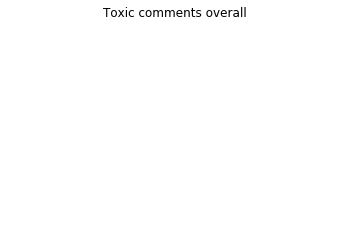

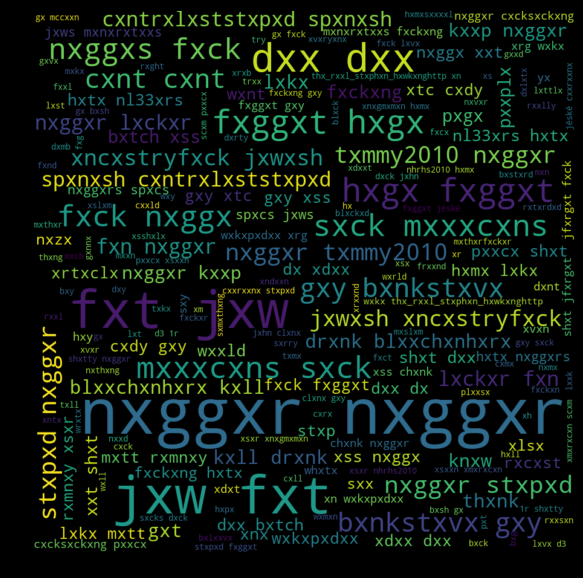

In [61]:
identity_hate_words = " ".join(identity_hate.comment_text)

obscene = identity_hate_words.split()
print(obscene[0:50]) 
print(type(obscene))

words = obscene
censored = []

# for word in words:
#     char_1 = word[0]
#     char_last = word[len(word)-1]
#     y=""
#     for c in range(1, len(word)-1):
#         y += "x"
  
#     temp = char_1 + y + char_last
#     censored.append(temp)

vowels = ['a', 'e', 'i', 'o', 'u']

for word in words:
    for c in word:
        if(c in vowels):
            word = word.replace(c, 'x')

    
    censored.append(word)

print("")
print(censored[0:20])

stringg = ""

for word in censored:
    stringg += " " + word


plt.clf()
wordcloud = WordCloud(width = 900, height = 900, background_color="black", stopwords="and").generate(stringg)
plt.title('Toxic comments overall')
plt.axis("off")
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig('toxic_wordcloud.png')